In [1]:
import numpy
import pandas
from matplotlib import pyplot

from data.dataimport import import_data
import data.tree
from encoders.baseencoder import AbstractEncoder

In [2]:
ENCODER_PKL = "../rnnsupervisedencoder-boolean5.pkl"
VALIDATION_DATA = "../expressions-synthetic/split/boolean5-validationset.json.gz"
DATA = VALIDATION_DATA

In [3]:
encoder = AbstractEncoder.load(ENCODER_PKL)

In [4]:
data = import_data(DATA)

In [5]:
def flatten_data(data):
    flat = []
    for key, class_ in data.items():
        for item in [class_['original']] + class_['noise']:
            flat.append({
                'eq_class': key,
                'expression': item
            })
    return flat
    
flat = flatten_data(data)

In [6]:
def set_encoding(encoder, flat):
    for item in flat:
        item['encoding'] = encoder.get_encoding(item['expression'])

set_encoding(encoder, flat)

Compiling Methods...
Compilation Finished...


In [7]:
def get_false():
    """The default representation for false expression."""
    return [item['expression'] for item in flat if item['expression'][0] == ['b', '^', 'b']][0]
get_false()

(['b', '^', 'b'], <data.tree.Node at 0x113f5f550>)

In [8]:
false_encoding = encoder.get_encoding(get_false())
false_encoding

array([-0.05628531,  0.02241225, -0.02625488, -0.05971872,  0.15319721,
        0.0144696 , -0.09275415,  0.43156213,  0.06643318,  0.36936334,
        0.13953656,  0.10206647, -0.04393727, -0.05643277, -0.18414126,
        0.07113698,  0.1051931 ,  0.243422  , -0.142121  , -0.09807719,
        0.16816173, -0.11816332, -0.0603916 ,  0.06505349,  0.06009852,
        0.08768972,  0.04275437, -0.04374632,  0.08093   ,  0.0170987 ,
       -0.00739129, -0.10984893, -0.10368592,  0.0370663 , -0.07511802,
        0.20793568,  0.13700417, -0.1051301 , -0.06446515,  0.16413054,
       -0.16899122, -0.0190493 ,  0.00492481,  0.0399795 ,  0.14373872,
        0.21634848,  0.09917384, -0.12689698, -0.07235545,  0.01559078,
        0.00614324, -0.15930116, -0.12306044,  0.03662971,  0.02992849,
        0.16698456,  0.03441484, -0.08856536, -0.14510651, -0.11923098,
       -0.06212965, -0.01015823, -0.06265337,  0.01580754], dtype=float32)

In [9]:
def set_dist_to_false(false_encoding, flat):
    def dist(x,y):   
        return numpy.sqrt(numpy.sum((x-y)**2))
    
    for item in flat:
        item['dist'] = dist(item['encoding'], false_encoding)
set_dist_to_false(false_encoding, flat)

In [10]:
def make_table(flat):
    return [{'eq_class': item['eq_class'],
             'expression': item['expression'][0],
             'dist': item['dist']} for item in flat]
table = make_table(flat)

In [11]:
pandas.set_option('max_rows', 200)
df = pandas.DataFrame(table)
df

,dist,eq_class,expression
0,1.004237,b,"[(, c, ^, c, ), ^, b]"
1,1.136416,b,"[b, &, (, c, >>, b, )]"
2,1.102464,b,"[(, b, &, c, ), |, b]"
3,1.135329,b,"[(, c, |, b, ), &, b]"
4,1.185671,b,"[b, &, (, b, |, c, )]"
5,1.160296,b,"[b, &, (, c, |, b, )]"
6,1.601686,b,"[a, ^, (, a, ^, b, )]"
7,1.187583,b,"[b, |, (, c, &, b, )]"
8,1.006962,b,"[(, b, &, b, ), &, b]"
9,1.103425,b,"[~, (, ~, (, b, &, b, ), )]"


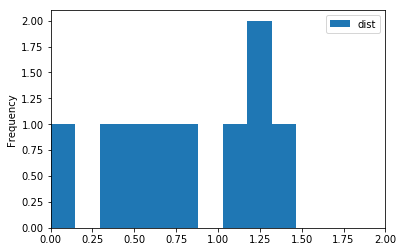

In [12]:
df[df.eq_class == 'False'].plot.hist(xlim=(0, 2))

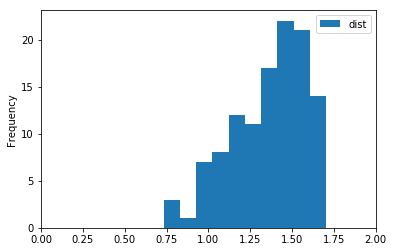

In [13]:
df[df.eq_class != 'False'].plot.hist(xlim=(0, 2))